In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

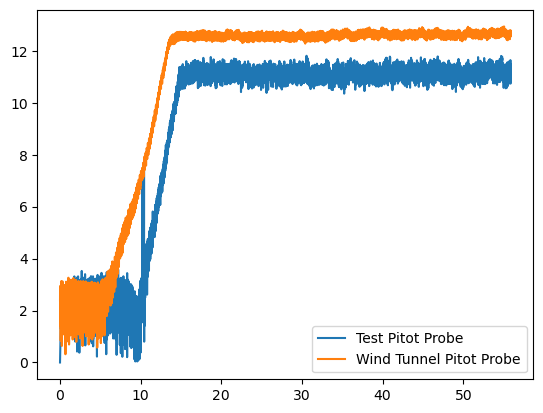

In [36]:
rho = 1.15
convFac = 1.016 #Volts -> mmHg

wind_tunnel_probe = pd.read_csv('wind_tunnel_6_27_23/Wind_Tunnel_Tube/PitotV060.csv')
col_name = 'TaredBaratronVoltage'
volt_data = wind_tunnel_probe[col_name]
num_volt_pts = len(volt_data)

for i in range(num_volt_pts):
    try:
        volt_data[i] = math.sqrt((2*volt_data[i]*133.322*convFac)/1.15)
    except ValueError:
        volt_data[i] = volt_data[i-1]

test_probe = pd.read_excel('wind_tunnel_6_27_23/Test_Tube/PyV060.xlsx')
vel_col = 'Velocity (m/s)'
time_col = 'Time Elapsed'

vel_data = test_probe[vel_col]
time_data = test_probe[time_col]
vel_data[0] = 0
time_data[0] = 0
num_time_pts = len(time_data)
time_end = time_data[num_time_pts-1]

volt_time_data = np.linspace(0,time_end, num_volt_pts)

fig, ax = plt.subplots()

ax.plot(time_data,vel_data, label='Test Pitot Probe')
ax.plot(volt_time_data,volt_data, label='Wind Tunnel Pitot Probe')

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()



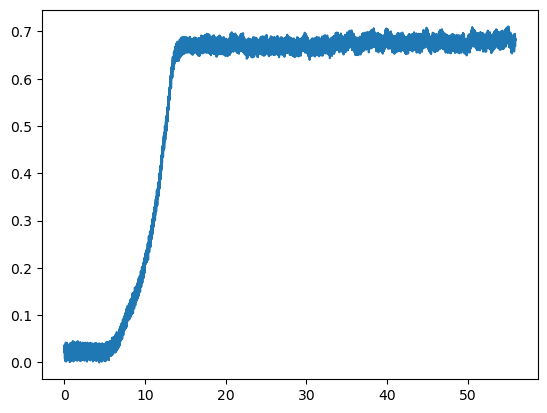

In [17]:
)